In [ ]:
#DESCRIPTION WAS AN ARTIFICAL RECURMENT NEURAL NETWORK CALLED LONG SHORT TERE MOMORY TO PREDICT THE CLOSING STOCK PRICE 

In [39]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
from datetime import datetime, timedelta
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.python import tf2
#DATAFRAM CHANGE TO DATASET
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [61]:
df=pd.read_csv(r"C:\Users\ibast\TESLA_STOCK.CSV")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
1,2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2,2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
3,2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
4,2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000
...,...,...,...,...,...,...,...
752,2021-12-27,1117.000000,1070.719971,1073.670044,1093.939941,23715300.0,1093.939941
753,2021-12-28,1119.000000,1078.420044,1109.489990,1088.469971,20108000.0,1088.469971
754,2021-12-29,1104.000000,1064.140015,1098.640015,1086.189941,18718000.0,1086.189941
755,2021-12-30,1095.550049,1053.150024,1061.329956,1070.339966,15680300.0,1070.339966


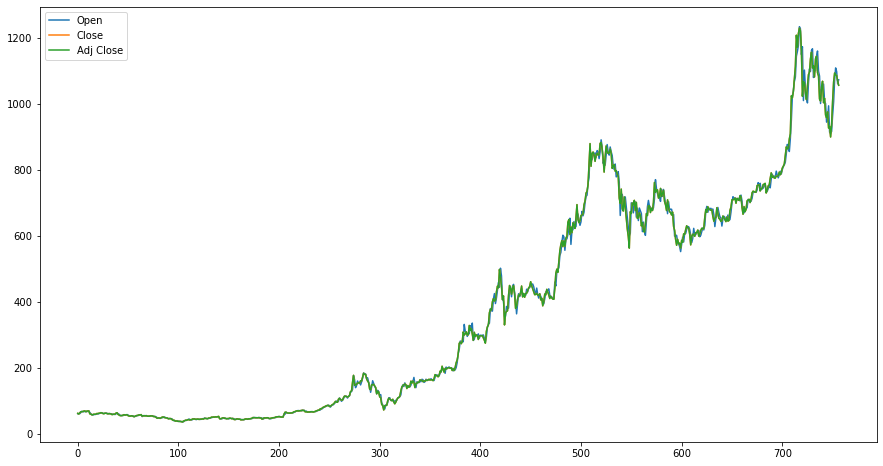

In [67]:
df[["Open","Close","Adj Close"]].plot(figsize=(15,8))
plt.show()

In [12]:
#SET THE INDEX #show the date
df=df.set_index(pd.DatetimeIndex(df["Date"].values))
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
2019-01-02,2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


In [23]:
#GET THE NUMBER OF ROWS AND COLUMNS IN THE DATA SET
df.shape

(757, 7)

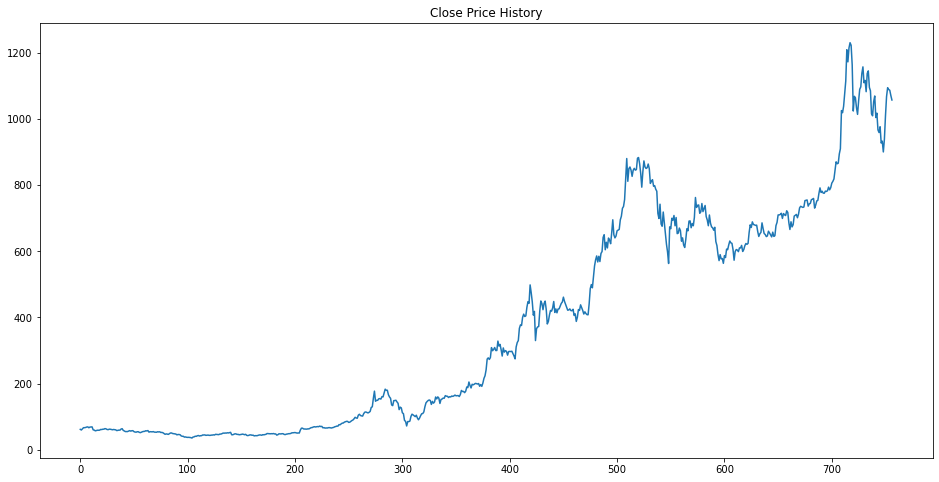

In [25]:
#visiulaze the closing history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.show()

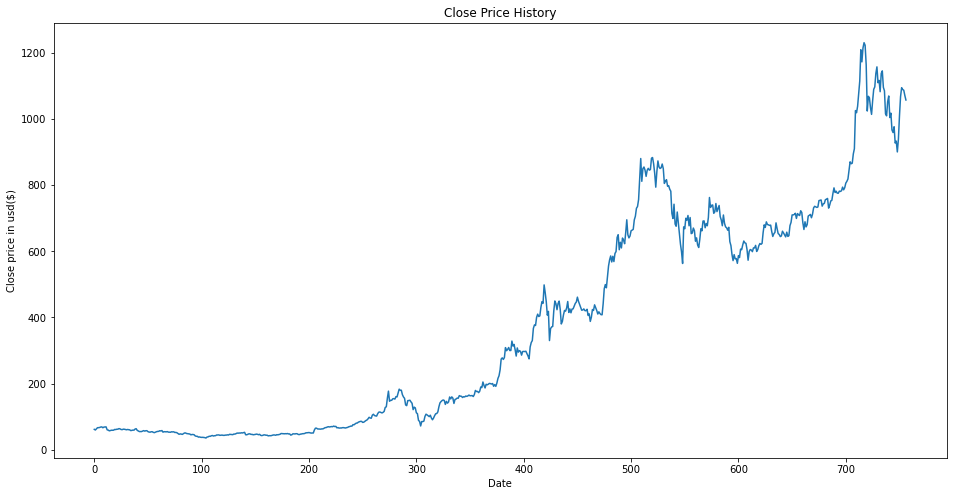

In [33]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Close price in usd($)")
plt.show()

In [35]:
#CREATE DATA FRAME ONLY CLOSE COLUMN
data=df.filter(["Close"])
data

,Close
0,62.023998
1,60.071999
2,63.537998
3,66.991997
4,67.070000
...,...
752,1093.939941
753,1088.469971
754,1086.189941
755,1070.339966


In [46]:
#CONVERT THE DATAFRAM TO A NUMPY ARRAY
dataset=data.values
dataset

array([[  62.02399826],
       [  60.0719986 ],
       [  63.5379982 ],
       [  66.99199677],
       [  67.06999969],
       [  67.70600128],
       [  68.9940033 ],
       [  69.45200348],
       [  66.87999725],
       [  68.88600159],
       [  69.20999908],
       [  69.46199799],
       [  60.45199966],
       [  59.7840004 ],
       [  57.51800156],
       [  58.30199814],
       [  59.40800095],
       [  59.27600098],
       [  59.49200058],
       [  61.75400162],
       [  61.40399933],
       [  62.44200134],
       [  62.57799911],
       [  64.26999664],
       [  63.44400024],
       [  61.5019989 ],
       [  61.15999985],
       [  62.56800079],
       [  62.36199951],
       [  61.63399887],
       [  60.75400162],
       [  61.57600021],
       [  61.12799835],
       [  60.51200104],
       [  58.24599838],
       [  58.94200134],
       [  59.75400162],
       [  59.5719986 ],
       [  62.94800186],
       [  63.97600174],
       [  58.95800018],
       [  57.071

In [45]:
#CONVERT THE DATAFRAM TO A NUMPY ARRAY
dataset=df["Adj Close"].tolist()
dataset

[62.02399826049805,
 60.071998596191406,
 63.53799819946289,
 66.99199676513672,
 67.06999969482422,
 67.70600128173828,
 68.99400329589844,
 69.4520034790039,
 66.87999725341797,
 68.88600158691406,
 69.20999908447266,
 69.46199798583984,
 60.45199966430664,
 59.78400039672852,
 57.51800155639648,
 58.30199813842773,
 59.40800094604492,
 59.2760009765625,
 59.492000579833984,
 61.75400161743164,
 61.40399932861328,
 62.44200134277344,
 62.57799911499024,
 64.2699966430664,
 63.44400024414063,
 61.50199890136719,
 61.15999984741211,
 62.56800079345703,
 62.36199951171875,
 61.63399887084961,
 60.75400161743164,
 61.57600021362305,
 61.12799835205078,
 60.512001037597656,
 58.24599838256836,
 58.94200134277344,
 59.75400161743164,
 59.571998596191406,
 62.948001861572266,
 63.97600173950195,
 58.95800018310547,
 57.071998596191406,
 55.30799865722656,
 55.24800109863281,
 55.31800079345703,
 56.82799911499024,
 58.18399810791016,
 56.672000885009766,
 57.79199981689453,
 57.992000579833

In [ ]:
#GET THE NUMBER OF ROWS TO TRAIN THE MODEL ON 


In [48]:
#SCALE THE DATA 
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.02196604],
       [0.02033136],
       [0.02323392],
       [0.02612644],
       [0.02619176],
       [0.02672437],
       [0.027803  ],
       [0.02818654],
       [0.02603264],
       [0.02771255],
       [0.02798388],
       [0.02819491],
       [0.02064959],
       [0.02009018],
       [0.01819254],
       [0.01884909],
       [0.0197753 ],
       [0.01966476],
       [0.01984564],
       [0.02173993],
       [0.02144683],
       [0.02231609],
       [0.02242998],
       [0.02384693],
       [0.0231552 ],
       [0.0215289 ],
       [0.02124249],
       [0.02242161],
       [0.02224909],
       [0.02163944],
       [0.02090249],
       [0.02159087],
       [0.02121569],
       [0.02069983],
       [0.01880219],
       [0.01938505],
       [0.02006505],
       [0.01991264],
       [0.02273984],
       [0.02360072],
       [0.01939845],
       [0.01781904],
       [0.0163418 ],
       [0.01629155],
       [0.01635017],
       [0.0176147 ],
       [0.01875027],
       [0.017

In [55]:
#CREATE THE TRAINING DATA SET
#CREATE THE SCALED TRANING DATA SET
training_data_len=math.ceil(len(dataset)*.8)
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()
        

[array([0.02196604, 0.02033136, 0.02323392, 0.02612644, 0.02619176,
       0.02672437, 0.027803  , 0.02818654, 0.02603264, 0.02771255,
       0.02798388, 0.02819491, 0.02064959, 0.02009018, 0.01819254,
       0.01884909, 0.0197753 , 0.01966476, 0.01984564, 0.02173993,
       0.02144683, 0.02231609, 0.02242998, 0.02384693, 0.0231552 ,
       0.0215289 , 0.02124249, 0.02242161, 0.02224909, 0.02163944,
       0.02090249, 0.02159087, 0.02121569, 0.02069983, 0.01880219,
       0.01938505, 0.02006505, 0.01991264, 0.02273984, 0.02360072,
       0.01939845, 0.01781904, 0.0163418 , 0.01629155, 0.01635017,
       0.0176147 , 0.01875027, 0.01748406, 0.018422  , 0.01858948,
       0.01615588, 0.01516101, 0.01482268, 0.01584938, 0.01591973,
       0.01433027, 0.01364189, 0.01487293, 0.01605539, 0.01669017])]
[0.0168978564934952]



In [ ]:
def get_max_close(symbol):
    